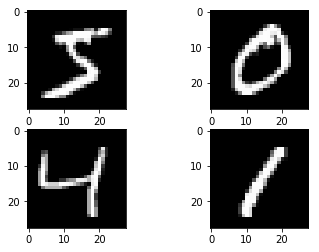

In [153]:

from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()


In [154]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [155]:
seed = 7
numpy.random.seed(seed)

In [156]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [157]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [158]:
X_train = X_train / 255
X_test = X_test / 255


In [159]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [160]:

def baseline_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [161]:
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 18s - loss: 0.2790 - acc: 0.9212 - val_loss: 0.1416 - val_acc: 0.9567
Epoch 2/10
 - 16s - loss: 0.1117 - acc: 0.9674 - val_loss: 0.0922 - val_acc: 0.9710
Epoch 3/10
 - 16s - loss: 0.0716 - acc: 0.9797 - val_loss: 0.0775 - val_acc: 0.9772
Epoch 4/10
 - 14s - loss: 0.0501 - acc: 0.9856 - val_loss: 0.0748 - val_acc: 0.9769
Epoch 5/10
 - 16s - loss: 0.0372 - acc: 0.9893 - val_loss: 0.0677 - val_acc: 0.9790
Epoch 6/10
 - 17s - loss: 0.0266 - acc: 0.9929 - val_loss: 0.0635 - val_acc: 0.9801
Epoch 7/10
 - 16s - loss: 0.0206 - acc: 0.9948 - val_loss: 0.0625 - val_acc: 0.9807
Epoch 8/10
 - 17s - loss: 0.0139 - acc: 0.9970 - val_loss: 0.0627 - val_acc: 0.9808
Epoch 9/10
 - 20s - loss: 0.0110 - acc: 0.9977 - val_loss: 0.0578 - val_acc: 0.9821
Epoch 10/10
 - 18s - loss: 0.0078 - acc: 0.9985 - val_loss: 0.0602 - val_acc: 0.9815
Baseline Error: 1.85%


In [162]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')


In [163]:
seed=7
numpy.random.seed(seed)

In [164]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')


In [165]:
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


In [166]:
def baseline_model():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [167]:


# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

SyntaxError: invalid syntax (<ipython-input-167-8d72fe3f9b3a>, line 8)